## File descriptions

train.csv - the training set

test.csv - the test set

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the 
column names used here

sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb

In [3]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [10]:
MissingV=df.columns[df.isna().any()].tolist()

In [11]:
TMissingV=test_df.columns[test_df.isna().any()].tolist()

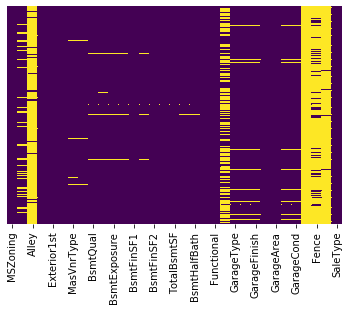

In [12]:
#sns.heatmap(df[MissingV].isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test_df[TMissingV].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df['LotFrontage'].isnull().sum()

259

In [14]:
TMissingV

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [15]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())



test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())

test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())


In [16]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])




test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])


test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [17]:
df.drop(['Id','Fence','FireplaceQu','MiscFeature','PoolQC','Alley','MSZoning'],axis=1,inplace=True)

In [18]:
test_df.drop(['Id','Fence','FireplaceQu','MiscFeature','PoolQC','Alley','MSZoning'],axis=1,inplace=True)

In [19]:
Categorical_cols=df.select_dtypes(include=['object']).columns
Numerical_cols=df.select_dtypes(exclude=['object']).columns

In [20]:
print('numerical columns:{0}'.format(len(Numerical_cols)))
Numerical_cols

numerical columns:37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
print('categorical columns:{0}'.format(len(Categorical_cols)))
Categorical_cols

categorical columns:37


Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
df[Numerical_cols].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   180.569112   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    23.994583   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1978.506164   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [23]:
df[Categorical_cols].describe()

Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count    1460     1460        1460      1460      1460      1460         1460   
unique      2        4           4         2         5         3           25   
top      Pave      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq     1454      925        1311      1459      1052      1382          225   

       Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
count        1460       1460     1460       1460      1460     1460   
unique          9          8        5          8         6        8   
top          Norm       Norm     1Fam     1Story     Gable  CompShg   
freq         1260       1445     1220        726      1141     1434   

       Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
count         1460        1460       1460      1460      1460       1460   
unique          15          16          4         4         5          6   
top        VinylSd     VinylSd       None        TA        TA      PConc   
freq           515         504        872       906      1282        647   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1460     1460         1460         1460         1460    1460   
unique        4        4            4            6            6       6   
top          TA       TA           No          Unf          Unf    GasA   
freq        686     1348          991          467         1294    1428   

       HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
count       1460       1460       1460        1460       1460       1460   
unique         5          2          5           4          7          6   
top           Ex          Y      SBrkr          TA        Typ     Attchd   
freq         741       1365       1335         735       1360        951   

       GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
count          1460       1460       1460       1460     1460          1460  
unique            3          5          5          3        9             6  
top             Unf         TA         TA          Y       WD        Normal  
freq            686       1392       1407       1340     1267          1198

# 1.2 Exploring numberical variables
.Find out low correlated variable with SalePrice.We will not using them.

.Find out strong correlations which we will use for modeling. And look closer.
.Because outliers can influence heavily the correlation, we need to detect ouliers(distribution, scatter plot)       them remove these rows
 
.Find out missing value and find strategy(constant, mean, median) to fill

.Find strong corelated variables(similar feature). We can consider use one of them.

### Look at correations with SalePrice


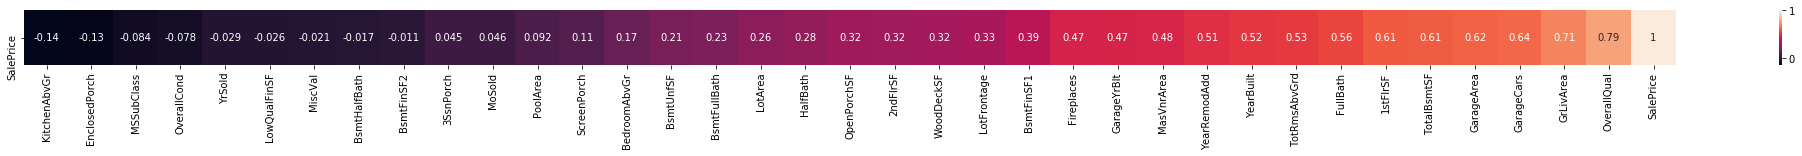

KitchenAbvGr  EnclosedPorch  MSSubClass  OverallCond    YrSold  \
SalePrice     -0.135907      -0.128578   -0.084284    -0.077856 -0.028923   

           LowQualFinSF  MiscVal  BsmtHalfBath  BsmtFinSF2  3SsnPorch  \
SalePrice     -0.025606 -0.02119     -0.016844   -0.011378   0.044584   

             MoSold  PoolArea  ScreenPorch  BedroomAbvGr  BsmtUnfSF  \
SalePrice  0.046432  0.092404     0.111447      0.168213   0.214479   

           BsmtFullBath   LotArea  HalfBath  OpenPorchSF  2ndFlrSF  \
SalePrice      0.227122  0.263843  0.284108     0.315856  0.319334   

           WoodDeckSF  LotFrontage  BsmtFinSF1  Fireplaces  GarageYrBlt  \
SalePrice    0.324413     0.334901     0.38642    0.466929     0.470177   

           MasVnrArea  YearRemodAdd  YearBuilt  TotRmsAbvGrd  FullBath  \
SalePrice    0.475241      0.507101   0.522897      0.533723  0.560664   

           1stFlrSF  TotalBsmtSF  GarageArea  GarageCars  GrLivArea  \
SalePrice  0.605852     0.613581    0.623431    0.640409   0.708624   

           OverallQual  SalePrice  
SalePrice     0.790982        1.0

In [24]:
fig= plt.figure(figsize=(37,1))
numerical_col_corr=df[Numerical_cols].corr().loc[['SalePrice'],:].sort_values(by='SalePrice',axis=1)
sns.heatmap(data=numerical_col_corr,annot=True)
plt.show()
numerical_col_corr

In [25]:
corr_threadhold=0.2
weak_num_cols=list(numerical_col_corr[abs(numerical_col_corr)<corr_threadhold].dropna(axis=1))
print("there are {0} weakly correlated values corr<0.2 : {1}".format(len(weak_num_cols),weak_num_cols))

there are 14 weakly correlated values corr<0.2 : ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr']


In [38]:
strong_num_cols=list(numerical_col_corr[abs(numerical_col_corr)>corr_threadhold].dropna(axis=1))
print("there are {0} strongly correlated values corr<0.2 : {1}".format(len(strong_num_cols),strong_num_cols))

there are 23 strongly correlated values corr<0.2 : ['BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']


In [39]:
#count the missing values for the numerical features
#numerical_null_count = df[Numerical_cols].isnull().sum()
#print("Missing values: ")
#print(numerical_null_count[numerical_null_count>0]) 

### write functions to create scatter plot and destribution for each numerical variable


In [40]:
plt.rcParams.update({'font.size': 14})

def explore_variable(col_name):
    strong_crr_cols=find_high_correlated_variables(col_name)
    draw_variable([col_name]+strong_crr_cols)
    
    
def draw_variable(col_names):
    num_cols=len(col_names)
    fig=plt.figure(figsize=(8,num_cols*4))
    i=0
    for col in col_names:
        fig.add_subplot(num_cols,2,2*i+1)   
        sns.regplot(x=df[col],y=df['SalePrice'])
        plt.xlabel(col)
        plt.title('      correlation to SalePrice = {0}'.format(numerical_col_corr[col])) 
        fig.add_subplot(num_cols,2,2*i+2)  
        sns.distplot(df[col].dropna())
        #sns.distplot(df[col])
        plt.xlabel(col)
        i+= 1
    plt.tight_layout()

variable_corr=df[list(set(Numerical_cols)-set(['SalePrice']))].corr()
high_corr_threadhold=0.65


def find_high_correlated_variables(col_name):
    corr=variable_corr.loc[[col_name],:]
    strong_corr=corr[(abs(corr)>=high_corr_threadhold)&(corr<1)].dropna(axis=1)
    print('Strong correlated variables')
    print(strong_corr)
    return list(strong_corr.columns)

### OverallQual

 . good shape of distribution
 
 . no outliers
 
 . missing value can be filled by mean() or median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [OverallQual]


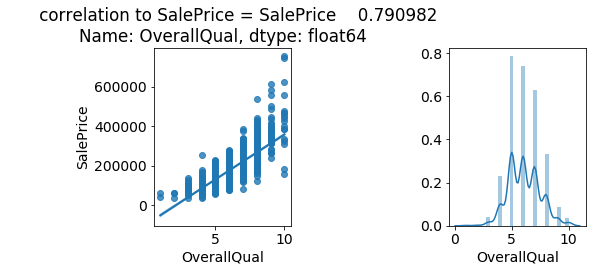

In [41]:
explore_variable('OverallQual')

### GrLivArea

.Slightly left skew distribution but still in good shape.

.2 outliers(> 4500)

.The missing values can be filled by median()

.Keep both GrLivArea and TotRmsAbvGrd and descard 2ndFlrSF

Strong correlated variables
           2ndFlrSF  TotRmsAbvGrd
GrLivArea  0.687501      0.825489


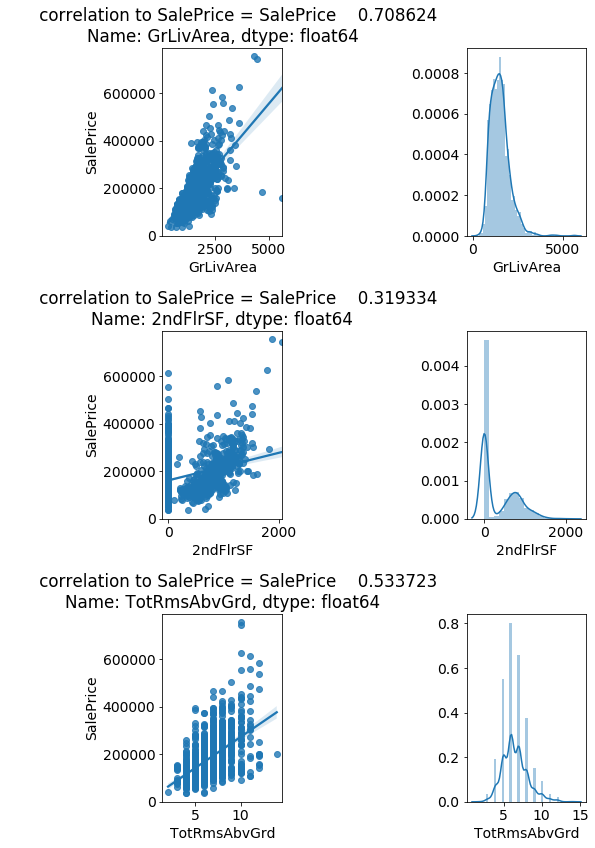

In [42]:
explore_variable('GrLivArea')

In [43]:
#check the mean()
df["GrLivArea"].describe()


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [44]:
#check the outliers
df["GrLivArea"].sort_values().tail()


1169    3627
691     4316
1182    4476
523     4676
1298    5642
Name: GrLivArea, dtype: int64

### GarageCars

.Good shape of distribution 

.No outliers 

.Missing values can be filled with mean() or median()

.keep both GarageCars and GarageArea

Strong correlated variables
            GarageArea
GarageCars    0.882475


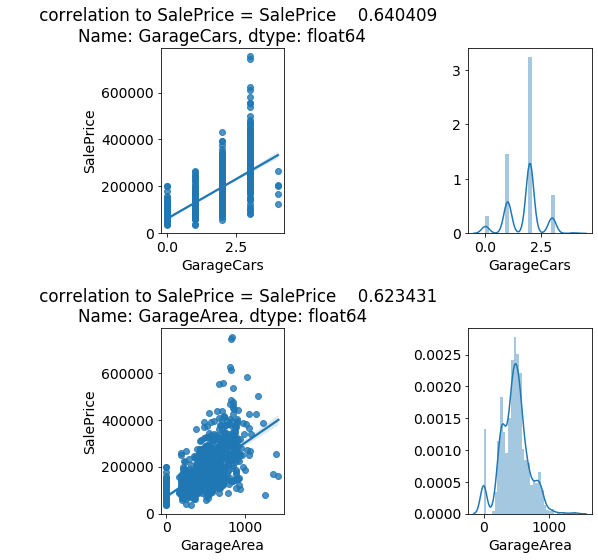

In [45]:
explore_variable("GarageCars")


### 1stFlrSF

.Left skew of distribution

.1 outlier (>5000)

.The missing value can be filled by median()

.We can remove strong related variable TotalBsmtSF


Strong correlated variables
          TotalBsmtSF
1stFlrSF      0.81953


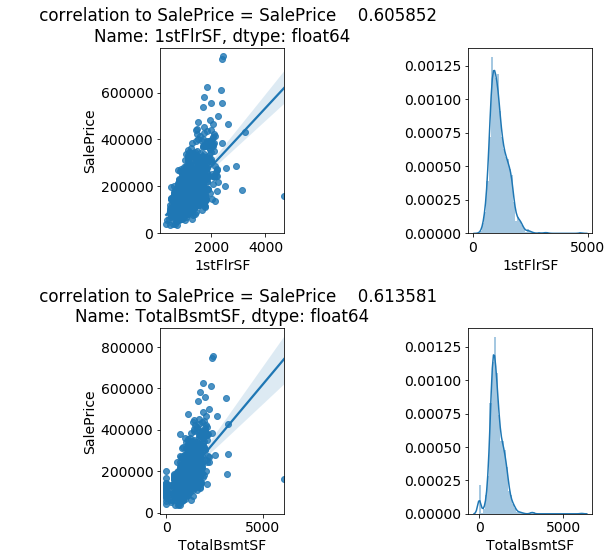

In [46]:
explore_variable("1stFlrSF")


### TotRmsAbvGrd

.Slightly left skew distribution

.No outlier

.The missing values can be filled by median()

.Keep both TotRmsAbvGrd and TotRmsAbvGrd and remoe bedroomsAbvGr


Strong correlated variables
              BedroomAbvGr  GrLivArea
TotRmsAbvGrd       0.67662   0.825489


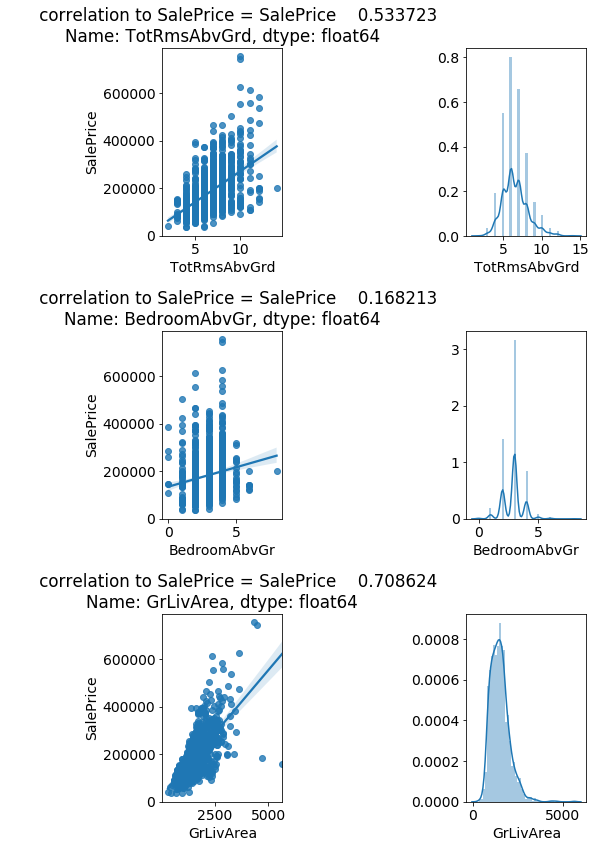

In [47]:
explore_variable("TotRmsAbvGrd")


### YearBuilt

.Right skew distribution

.No outlier

.This is basic infomation of a hourse, so the columns should not has     any missing values.

.We can remove strong related variable GarageYrBlt


Strong correlated variables
           GarageYrBlt
YearBuilt     0.780555


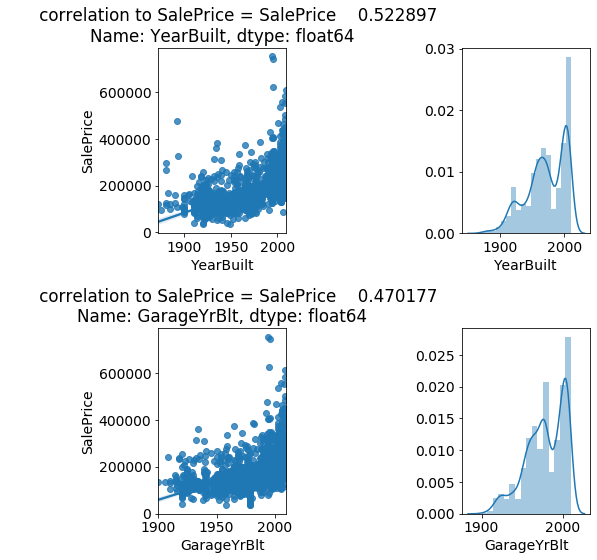

In [48]:
explore_variable("YearBuilt")


### YearRemodAdd

.At the first look, maybe some outlier where the price went too high.
However go back to OverallQual scatter plot, these house has 
OverallQual 10. It's resonable. -> No oulier

.Missing value should be fill by YearBuilt value. However, in both train and test dataset there is no null value of YearRemodAdd, so we don't need to fill this variavle.

Strong correlated variables
Empty DataFrame
Columns: []
Index: [YearRemodAdd]


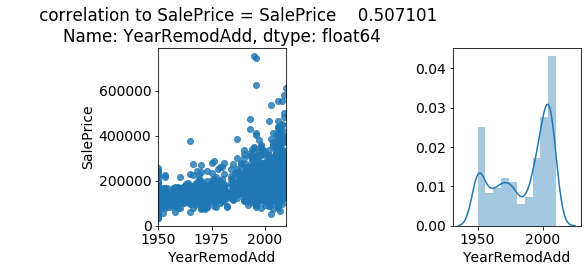

In [49]:
explore_variable("YearRemodAdd")

### MasVnrArea

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [MasVnrArea]


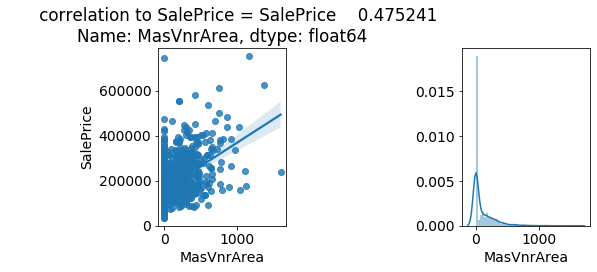

In [50]:
explore_variable("MasVnrArea")


### MasVnrArea

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0


Strong correlated variables
Empty DataFrame
Columns: []
Index: [Fireplaces]


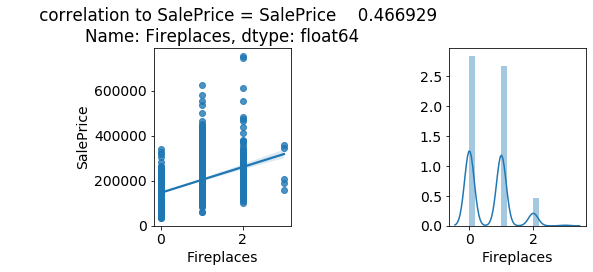

In [51]:
explore_variable("Fireplaces")


### BsmtFinSF1

Left skew distribution. Almost values are 0.

1 outlier(>4000)

Missing value can be filled by median() or 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [LotFrontage]


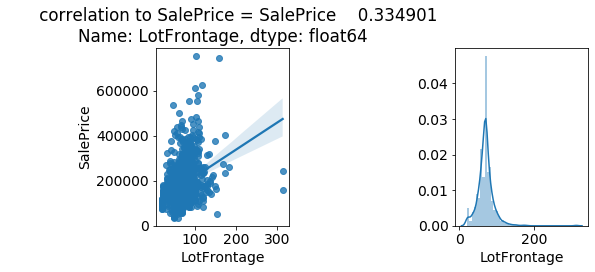

In [52]:
explore_variable("LotFrontage")


### WoodDeckSF

Left skew distribution. Almost values = 0

No outlier

Missing value can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [WoodDeckSF]


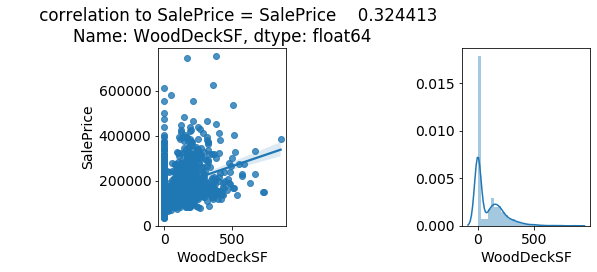

In [53]:
explore_variable("WoodDeckSF")


### 2ndFlrSF

Left skew distribution. Most values are 0

No outliers

Missing value can be filled by 0


Strong correlated variables
          GrLivArea
2ndFlrSF   0.687501


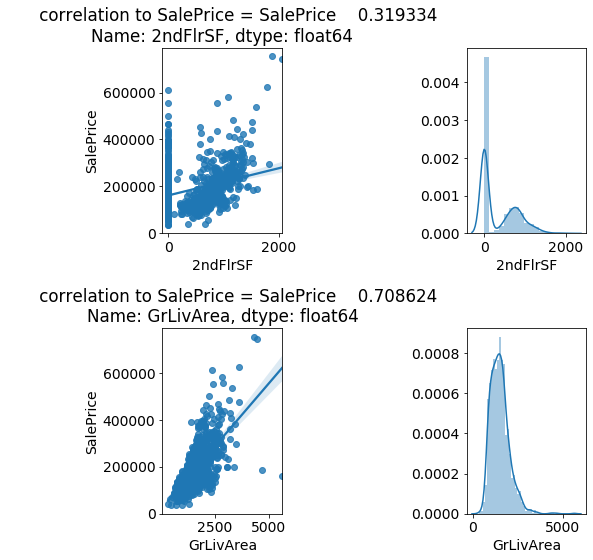

In [54]:
explore_variable("2ndFlrSF")


### OpenPorchSF 

Left skew distribution. Most values are 0

No outlier

Missing values can be filled by 0

Strong correlated variables
Empty DataFrame
Columns: []
Index: [OpenPorchSF]


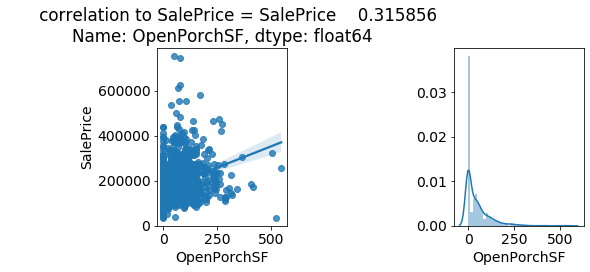

In [55]:
explore_variable("OpenPorchSF")


### HalfBath

No outlier

Missing value can be fill as 0( most frequent value)

Strong correlated variables
Empty DataFrame
Columns: []
Index: [HalfBath]


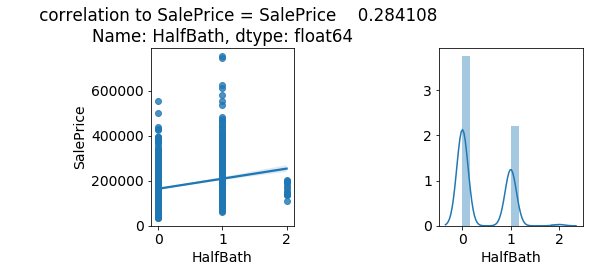

In [56]:
explore_variable("HalfBath")


### LotArea

Left skew distribution

No outlier

Missing values can be filled by median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [LotArea]


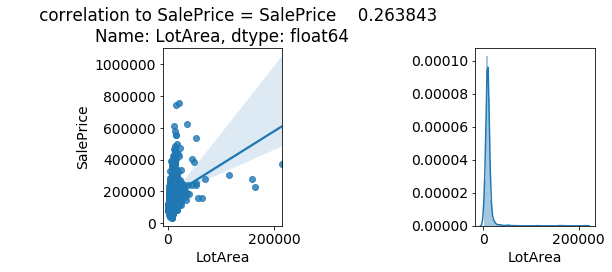

In [57]:
explore_variable("LotArea")


### BsmtFullBath

No outlier

Missing value can be filled by 0(most frequent value)

Strong correlated variables
Empty DataFrame
Columns: []
Index: [BsmtFullBath]


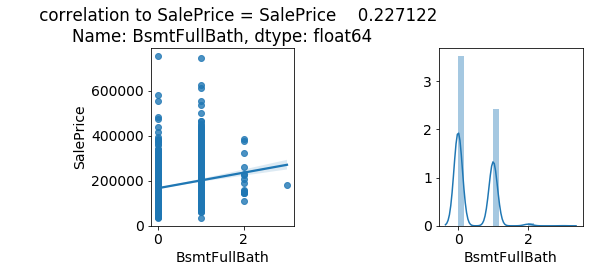

In [58]:
explore_variable("BsmtFullBath")


### BsmtUnfSF

Left skew distribution

No outlier

Missing values can be filled by median()

Strong correlated variables
Empty DataFrame
Columns: []
Index: [BsmtUnfSF]


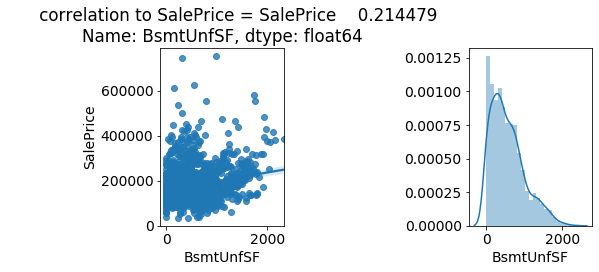

In [59]:
explore_variable("BsmtUnfSF")


## 1.3 Exploring categorical variables


As show bellow, by addition of KitchenQual, the price ranges are seperated quite clearly.

Basically, we will use all categorical columns and using One Hot Encoding but with large number of unique value we can consider to use LabelEncoder, CountEncoder, TargetEncoder or CatBoostEncoder.

We also need to remove un-useful columns, which has large number of missing values.

<Figure size 432x864 with 0 Axes>

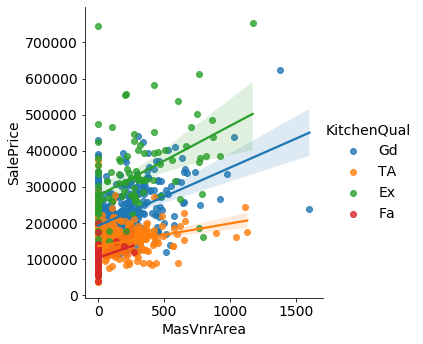

In [60]:
fig = plt.figure(figsize=(6,12))
sns.lmplot(x="MasVnrArea", y="SalePrice", hue="KitchenQual", data=df) 

<Figure size 432x864 with 0 Axes>

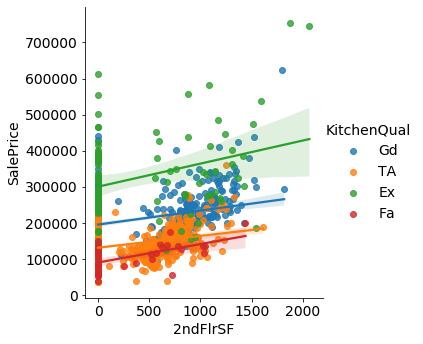

In [62]:
fig = plt.figure(figsize=(6,12))
sns.lmplot(x="2ndFlrSF", y="SalePrice", hue="KitchenQual", data=df) 

The number of unique values each variable are show as bellow. Not much of variable so we will apply One Hot Encoding for all categorical variables.

In [65]:
unique_val_num_dict = {col:len(df[col].unique())  for col in Categorical_cols}
sorted(unique_val_num_dict.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

Bellow is the number of null values.

We will drop Alley, PoolQC, Fence, MiscFeature.

The other missing values will be fill up by SimpleImputer-most_frequent value

In [68]:
null_count = df[Categorical_cols].isnull().sum()
null_count[null_count>0].dropna(axis=0)

Series([], dtype: int64)

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

            Specs         Score
2         LotArea  1.011497e+07
33        MiscVal  6.253332e+06
13       2ndFlrSF  4.648841e+05
8      BsmtFinSF1  3.999851e+05
32       PoolArea  3.835642e+05
9      BsmtFinSF2  3.688827e+05
7      MasVnrArea  2.857403e+05
10      BsmtUnfSF  2.747512e+05
14   LowQualFinSF  2.448810e+05
15      GrLivArea  1.968501e+05
11    TotalBsmtSF  1.747065e+05
30      3SsnPorch  1.549360e+05
31    ScreenPorch  1.366295e+05
27     WoodDeckSF  1.298338e+05
12       1stFlrSF  1.238098e+05
29  EnclosedPorch  9.888657e+04
26     GarageArea  9.618405e+04
28    OpenPorchSF  7.436257e+04
0      MSSubClass  1.928123e+04
1     LotFrontage  5.066301e+03


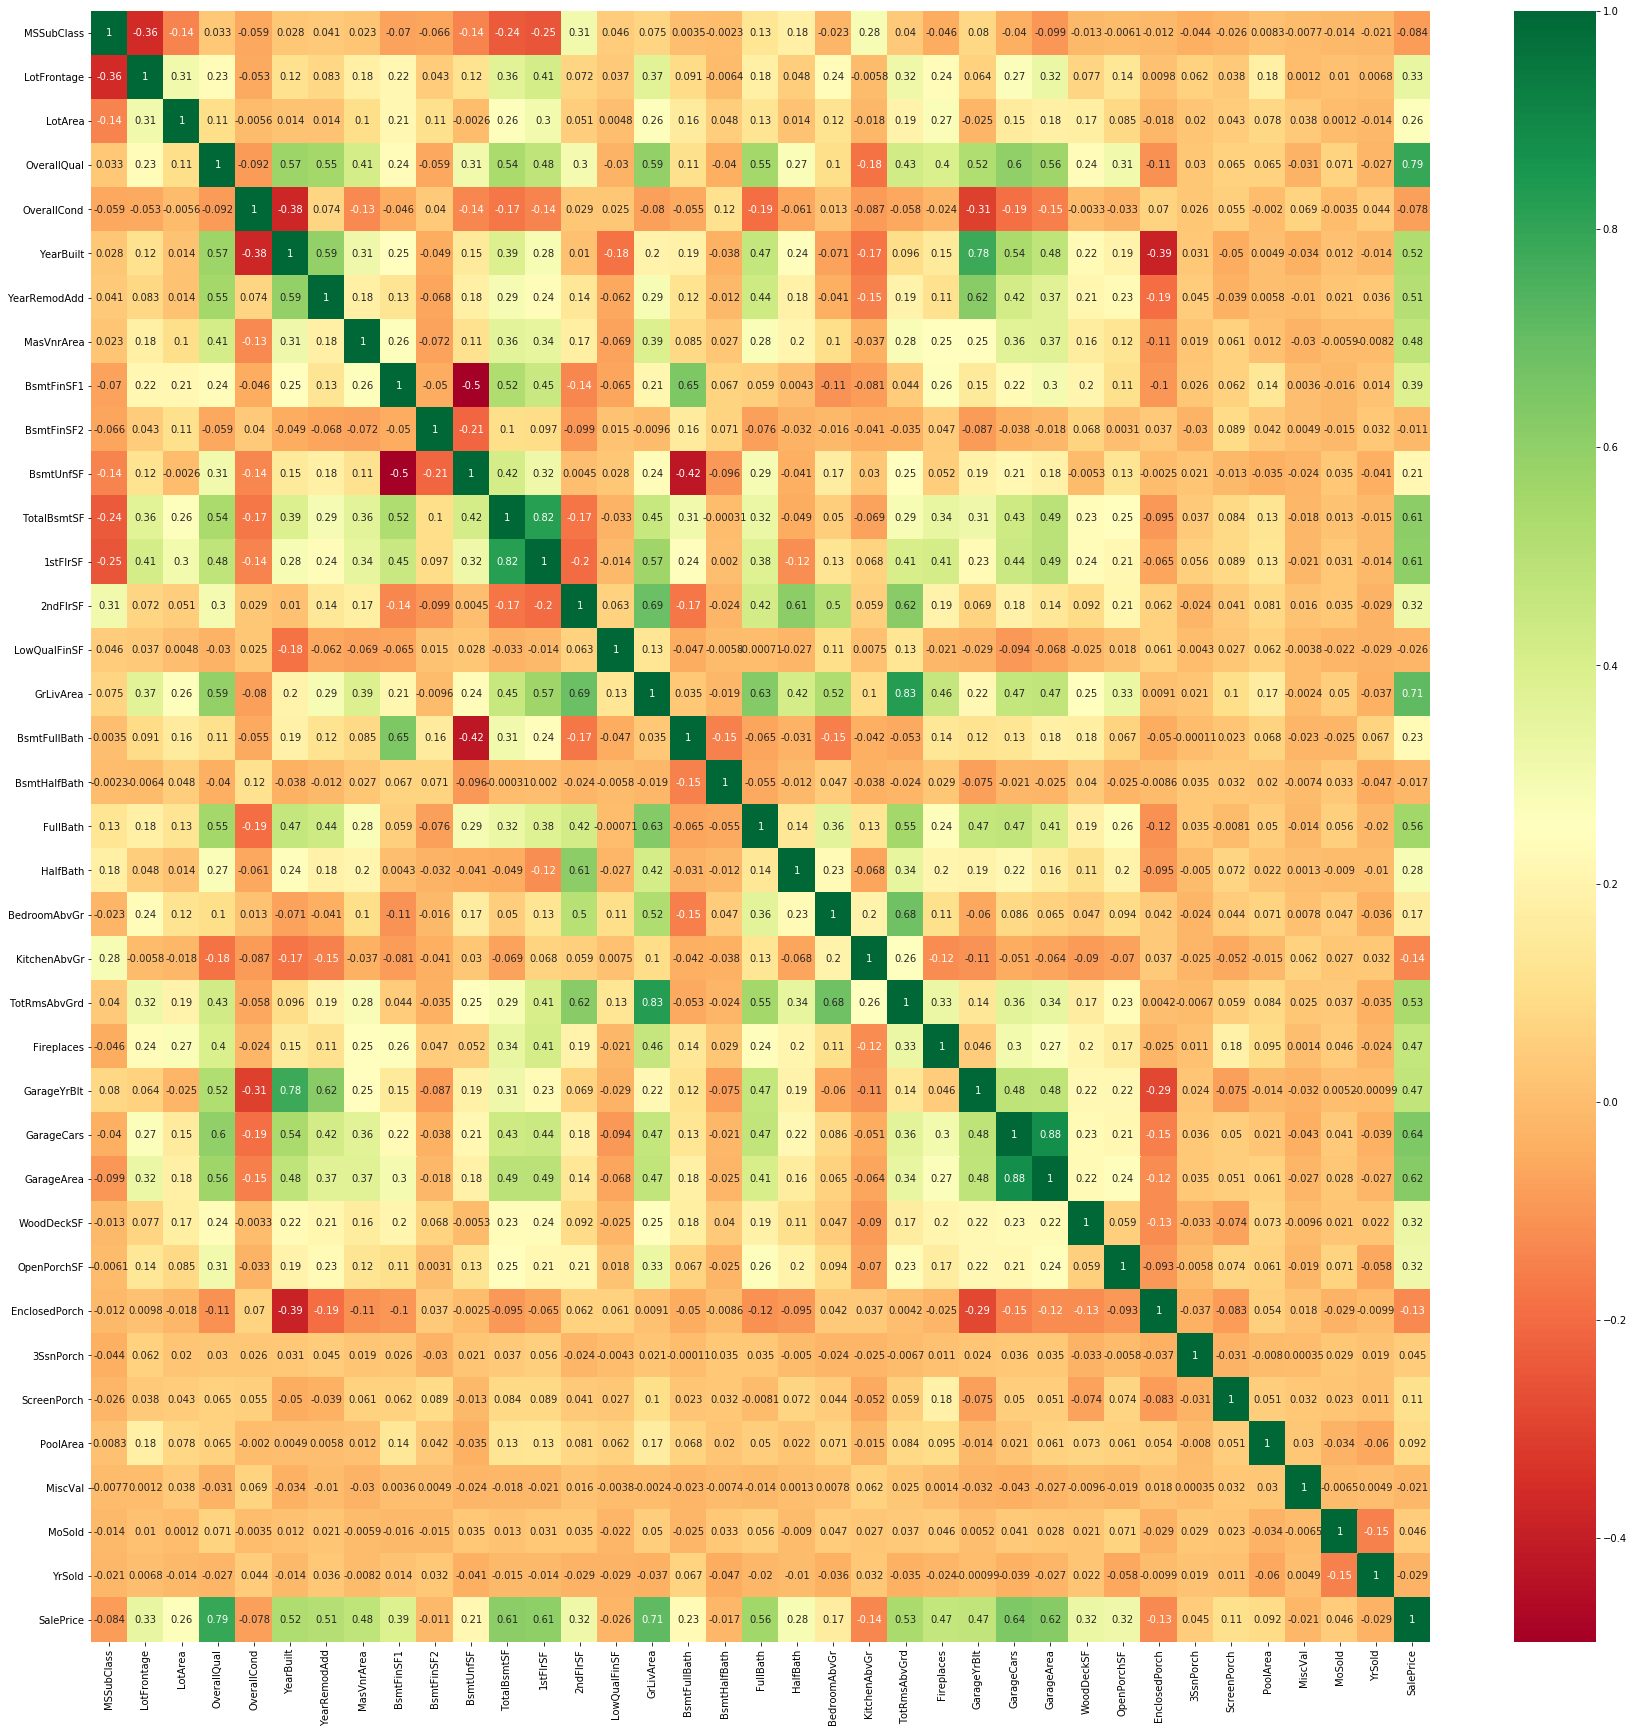

In [126]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
#test_df= test_df.dropna(how='any',axis=0) 

In [21]:
cols=df.columns

In [22]:
numF=df._get_numeric_data().columns

In [23]:
#First we define the list of categorical features that we will want to process:


In [24]:
catF=list(set(cols) - set(numF))

In [25]:
# We can really quickly build dummy features with pandas by calling the get_dummies function.
# Let's create a new DataFrame for our processed data:

In [26]:
df_processed = pd.get_dummies(df, prefix_sep="__",columns=catF)

In [27]:
#df_processed.head()
df_processed.shape

(1460, 266)

In [28]:
#That’s it for the training set part, now you have a DataFrame with one hot encoded features.
#We will need to save a few things into variables to make sure that we build the exact same columns on the test dataset.
#See how pandas created new columns with the following format: <column__value>.
#Let’s create a list that looks for those new columns and store them in a new variable cat_dummies.

In [29]:
cat_dummies = [col for col in df_processed if "__" in col and col.split("__")[0] in catF]

In [30]:
cat_dummies

['Heating__Floor',
 'Heating__GasA',
 'Heating__GasW',
 'Heating__Grav',
 'Heating__OthW',
 'Heating__Wall',
 'GarageQual__Ex',
 'GarageQual__Fa',
 'GarageQual__Gd',
 'GarageQual__Po',
 'GarageQual__TA',
 'Street__Grvl',
 'Street__Pave',
 'LandContour__Bnk',
 'LandContour__HLS',
 'LandContour__Low',
 'LandContour__Lvl',
 'Foundation__BrkTil',
 'Foundation__CBlock',
 'Foundation__PConc',
 'Foundation__Slab',
 'Foundation__Stone',
 'Foundation__Wood',
 'SaleType__COD',
 'SaleType__CWD',
 'SaleType__Con',
 'SaleType__ConLD',
 'SaleType__ConLI',
 'SaleType__ConLw',
 'SaleType__New',
 'SaleType__Oth',
 'SaleType__WD',
 'Condition1__Artery',
 'Condition1__Feedr',
 'Condition1__Norm',
 'Condition1__PosA',
 'Condition1__PosN',
 'Condition1__RRAe',
 'Condition1__RRAn',
 'Condition1__RRNe',
 'Condition1__RRNn',
 'CentralAir__N',
 'CentralAir__Y',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'LotConfig__Corner',
 'LotConfig__CulDSac',
 'LotConfig__FR2',
 'LotCo

In [31]:
#Let’s also save the list of columns so we can enforce the order of columns later on.

In [32]:
processed_columns = list(df_processed.columns[:])

In [33]:
#processed_columns

In [34]:
#Process our unseen (test) data!
#Now let’s see how to ensure our test data has the same columns, first let’s call get_dummies on it:

In [82]:
df_test_processed = pd.get_dummies(test_df, prefix_sep="__", columns=catF)
df_test_processed=df_test_processed.astype(float)

In [83]:
df_test_processed.head()
#df_test_processed.shape

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        20.0         80.0  11622.0          5.0          6.0     1961.0   
1        20.0         81.0  14267.0          6.0          6.0     1958.0   
2        60.0         74.0  13830.0          5.0          5.0     1997.0   
3        60.0         78.0   9978.0          6.0          6.0     1998.0   
4       120.0         43.0   5005.0          8.0          5.0     1992.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        1961.0         0.0       468.0       144.0      270.0        882.0   
1        1958.0       108.0       923.0         0.0      406.0       1329.0   
2        1998.0         0.0       791.0         0.0      137.0        928.0   
3        1998.0        20.0       602.0         0.0      324.0        926.0   
4        1992.0         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     896.0       0.0           0.0      896.0           0.0           0.0   
1    1329.0       0.0           0.0     1329.0           0.0           0.0   
2     928.0     701.0           0.0     1629.0           0.0           0.0   
3     926.0     678.0           0.0     1604.0           0.0           0.0   
4    1280.0       0.0           0.0     1280.0           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       1.0       0.0           2.0           1.0           5.0         0.0   
1       1.0       1.0           3.0           1.0           6.0         0.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       2.0       1.0           3.0           1.0           7.0         1.0   
4       2.0       0.0           2.0           1.0           5.0         0.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1961.0         1.0       730.0       140.0          0.0   
1       1958.0         1.0       312.0       393.0         36.0   
2       1997.0         2.0       482.0       212.0         34.0   
3       1998.0         2.0       470.0       360.0         36.0   
4       1992.0         2.0       506.0         0.0         82.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0        120.0       0.0      0.0     6.0  2010.0   
1            0.0        0.0          0.0       0.0  12500.0     6.0  2010.0   
2            0.0        0.0          0.0       0.0      0.0     3.0  2010.0   
3            0.0        0.0          0.0       0.0      0.0     6.0  2010.0   
4            0.0        0.0        144.0       0.0      0.0     1.0  2010.0   

   Heating__GasA  Heating__GasW  Heating__Grav  Heating__Wall  GarageQual__Fa  \
0            1.0            0.0            0.0            0.0             0.0   
1            1.0            0.0            0.0            0.0             0.0   
2            1.0            0.0            0.0            0.0             0.0   
3            1.0            0.0            0.0            0.0             0.0   
4            1.0            0.0            0.0            0.0             0.0   

   GarageQual__Gd  GarageQual__Po  GarageQual__TA  Street__Grvl  Street__Pave  \
0             0.0             0.0             1.0           0.0           1.0   
1             0.0             0.0             1.0           0.0           1.0   
2             0.0             0.0             1.0           0.0           1.0   
3             0.0             0.0             1.0           0.0           1.0   
4             0.0             0.0             1.0           0.0           1.0   

   LandContour__Bnk  LandContour__HLS  LandContour__Low  LandContour__Lvl  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               1.0   
2               0.0               0.0       

In [84]:
X = df_processed.drop(['SalePrice'],axis=1)  #independent columns
y = df_processed['SalePrice']   #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier

In [85]:
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.03058578e-02 2.12134884e-02 2.12977767e-02 1.50192871e-02
 1.18909975e-02 1.88190096e-02 1.74368520e-02 1.45231653e-02
 2.07931079e-02 5.41529432e-03 2.19364370e-02 2.06994491e-02
 2.21426720e-02 1.43690118e-02 8.45687076e-04 2.07836105e-02
 1.08190074e-02 3.57668953e-03 6.31813776e-03 8.46793028e-03
 1.21512762e-02 1.61414927e-03 1.81776382e-02 1.16986308e-02
 1.88364653e-02 1.13720835e-02 2.21886005e-02 1.73212491e-02
 1.65414667e-02 6.09606773e-03 1.22818310e-03 5.15964933e-03
 2.97749310e-04 2.16565573e-03 2.12826615e-02 2.01787361e-02
 0.00000000e+00 8.96219194e-04 3.94385963e-04 2.06134138e-04
 0.00000000e+00 1.05521047e-04 1.97926945e-04 1.21510218e-03
 6.09325567e-04 1.03067069e-04 2.20921051e-03 6.87113793e-05
 1.37422759e-04 2.38035028e-03 1.97719396e-03 1.34116998e-03
 4.16354080e-03 3.10922211e-03 5.92241968e-03 4.62872040e-03
 8.40198484e-04 2.11104007e-04 6.99236296e-05 1.72028784e-03
 1.37606479e-04 1.71947726e-04 6.07330272e-04 1.37422759e-04
 2.63393621e-04 2.257186

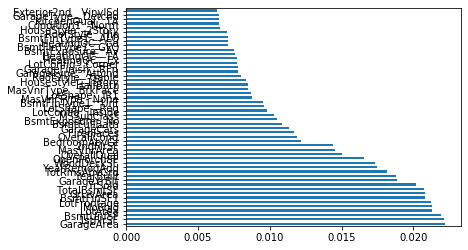

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [87]:
topF=pd.DataFrame(feat_importances,columns=['result']).sort_values(by='result',ascending=False).head(50)
topF=list(topF.index)
topF

['GarageArea',
 '1stFlrSF',
 'BsmtUnfSF',
 'LotArea',
 'MoSold',
 'LotFrontage',
 'BsmtFinSF1',
 'GrLivArea',
 'TotalBsmtSF',
 'YrSold',
 'GarageYrBlt',
 'YearBuilt',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'WoodDeckSF',
 'OpenPorchSF',
 'OverallQual',
 'MasVnrArea',
 '2ndFlrSF',
 'BedroomAbvGr',
 'OverallCond',
 'Fireplaces',
 'GarageCars',
 'BsmtFullBath',
 'BsmtExposure__No',
 'MSSubClass',
 'LotConfig__Inside',
 'LotShape__Reg',
 'BsmtFinType1__Unf',
 'MasVnrType__None',
 'LotShape__IR1',
 'MasVnrType__BrkFace',
 'HalfBath',
 'HouseStyle__1Story',
 'RoofStyle__Gable',
 'GarageType__Attchd',
 'GarageFinish__RFn',
 'LotConfig__Corner',
 'HeatingQC__Ex',
 'HeatingQC__TA',
 'BsmtExposure__Av',
 'BsmtFinType1__GLQ',
 'HeatingQC__Gd',
 'BsmtFinType1__ALQ',
 'RoofStyle__Hip',
 'HouseStyle__2Story',
 'Condition1__Norm',
 'KitchenQual__TA',
 'GarageType__Detchd',
 'Exterior2nd__VinylSd']

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

            Specs         Score
2         LotArea  1.011497e+07
33        MiscVal  6.253332e+06
13       2ndFlrSF  4.648841e+05
8      BsmtFinSF1  3.999851e+05
32       PoolArea  3.835642e+05
9      BsmtFinSF2  3.688827e+05
7      MasVnrArea  2.857403e+05
10      BsmtUnfSF  2.747512e+05
14   LowQualFinSF  2.448810e+05
15      GrLivArea  1.968501e+05
11    TotalBsmtSF  1.747065e+05
30      3SsnPorch  1.549360e+05
31    ScreenPorch  1.366295e+05
27     WoodDeckSF  1.298338e+05
12       1stFlrSF  1.238098e+05
29  EnclosedPorch  9.888657e+04
26     GarageArea  9.618405e+04
28    OpenPorchSF  7.436257e+04
0      MSSubClass  1.928123e+04
1     LotFrontage  5.066301e+03


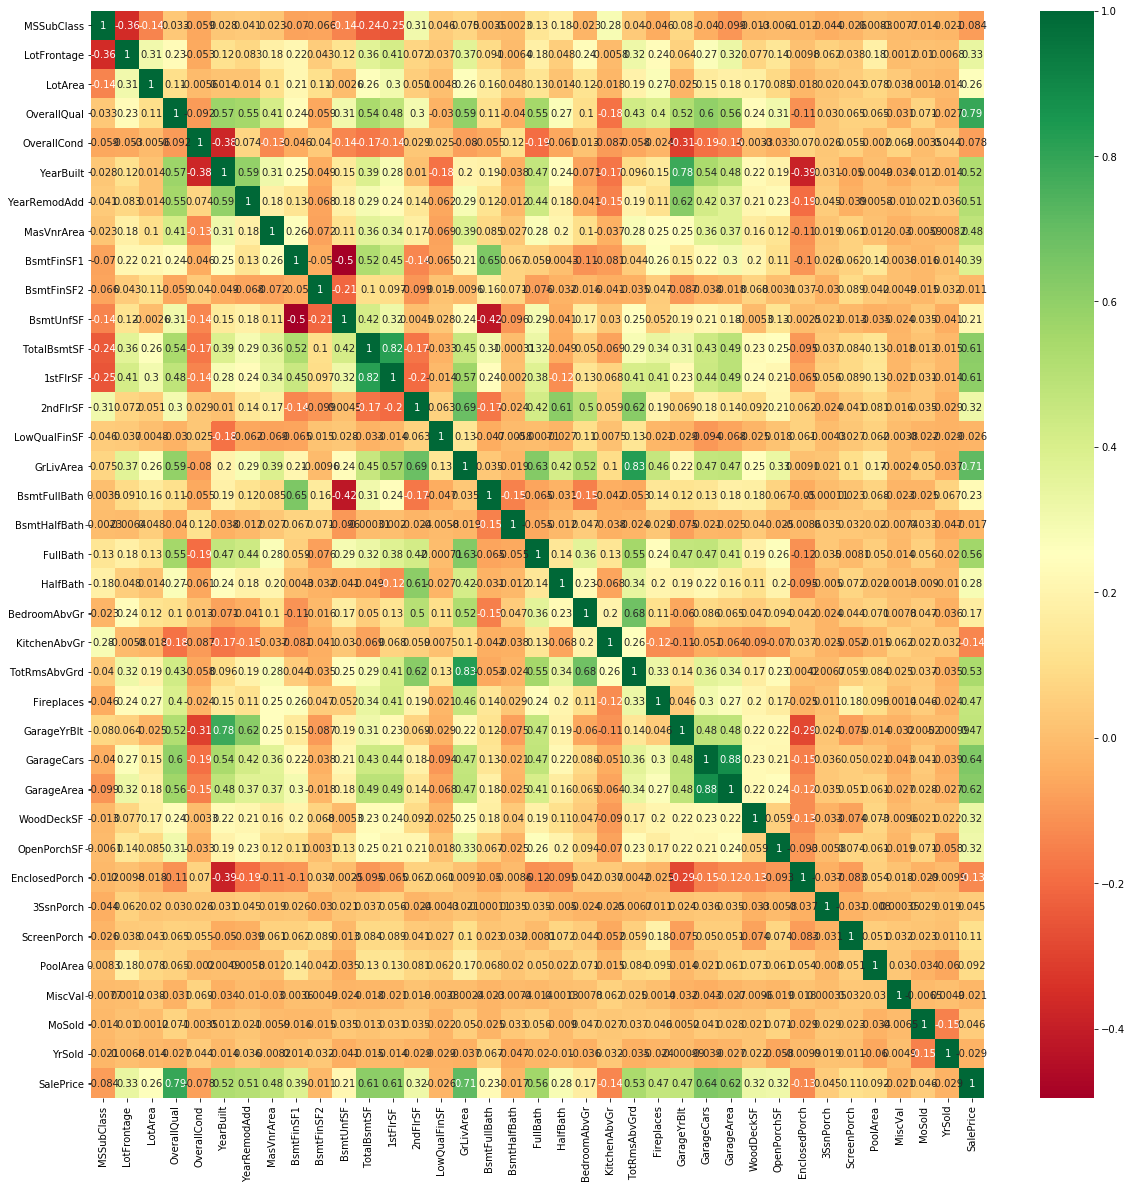

In [89]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [90]:
#As expected we have new columns  and missing ones. But we can easily clean it up!

In [91]:
# Remove additional columns
for col in df_test_processed.columns:
    if ("__" in col) and (col.split("__")[0] in catF) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        df_test_processed.drop(col, axis=1, inplace=True)

In [92]:
#Now we need to add the missing columns.
#We can set all missing columns to a vector of 0s since those values did not appear in the test data.

In [93]:
for col in cat_dummies:
    if col not in df_test_processed.columns:
        print("Adding missing feature {}".format(col))
        df_test_processed[col] = 0

Adding missing feature Heating__Floor
Adding missing feature Heating__OthW
Adding missing feature GarageQual__Ex
Adding missing feature HouseStyle__2.5Fin
Adding missing feature Utilities__NoSeWa
Adding missing feature Electrical__Mix
Adding missing feature Condition2__RRAe
Adding missing feature Condition2__RRAn
Adding missing feature Condition2__RRNn
Adding missing feature Exterior1st__ImStucc
Adding missing feature Exterior1st__Stone
Adding missing feature Exterior2nd__Other
Adding missing feature RoofMatl__ClyTile
Adding missing feature RoofMatl__Membran
Adding missing feature RoofMatl__Metal
Adding missing feature RoofMatl__Roll


In [94]:
#That’s it, we now have the same features.
#Note that the order of the columns isn’t kept though,
#if you need to reorder the columns,
#reuse the list of processed columns we saved earlier:

In [95]:
#df_test_processed = df_test_processed[processed_columns]

In [96]:
df_processed=df_processed.loc[:,~df_processed.columns.duplicated()]

In [97]:
X_train=df_processed[topF].astype(float)
y_train=df_processed['SalePrice'].astype(float)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 90, 100, 110],
    'max_features': [2, 3,10],
    'min_samples_leaf': [2,3, 4, 5,10],
    'min_samples_split': [6,8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train )
grid_search.best_params_

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  8.2min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

In [99]:
#create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True,max_depth=100,max_features=10,min_samples_leaf=2,min_samples_split=6,n_estimators=300)
#train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_pred=clf.predict(df_test_processed[topF])

In [101]:
#Create sample submission file and submit

In [102]:
pred=pd.DataFrame(y_pred)
pred.head()

0
0  120500.0
1  158000.0
2  173000.0
3  173000.0
4  170000.0

In [103]:
sub_df=pd.read_csv('sample_submission.csv')
dataset=pd.concat([sub_df['Id'],pred],axis=1)

In [104]:
dataset.columns=['Id','SalePrice']


In [105]:
dataset.to_csv('SAmple Submission.csv',index=False)